In [1]:
#separates data into 3 categories: food, supplements, cosmetics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CAERS_ProductBased.csv")
df = df.dropna(axis = 1, how = "all")
df = df[df["PRODUCT_TYPE"] == "SUSPECT"]
df = df[df["PRODUCT"] != "EXEMPTION 4"]
print(df.shape)
# print(df.iloc[:5, :])

(109173, 12)


In [3]:
food_df = df[df["PRODUCT_CODE"] < "40"]
# print(food_df.iloc[:5, :])
print(food_df.shape)

(31213, 12)


In [4]:
supp_df = df[df["PRODUCT_CODE"] == "54"]
# print(supp_df.iloc[:5, :])
print(supp_df.shape)

(54717, 12)


In [5]:
cosmetic_df = df[df["PRODUCT_CODE"] == "53"]
print(cosmetic_df.shape)

(13459, 12)


In [6]:
death_food = food_df[food_df['CASE_OUTCOME'].str.contains("Death", na= False)]
print("Complaints that lead to death from food: " + str(death_food.shape[0]))
disability_food = food_df[food_df['CASE_OUTCOME'].str.contains("Disability", na= False)]
print("Complaints that lead to disability from food: " + str(disability_food.shape[0]))
hosp_food = food_df[food_df['CASE_OUTCOME'].str.contains('Hospit|Emergency', na= False)]
print("Complaints that lead to hospitalization or ER visit from food: " + str(hosp_food.shape[0]))
other_food = food_df[~food_df['CASE_OUTCOME'].str.contains('Death|Disability|Hospit|Emergency', na= False)]
print("Complaints that lead to other outcomes from supplements: " + str(other_food.shape[0]))

Complaints that lead to death from food: 202
Complaints that lead to disability from food: 1390
Complaints that lead to hospitalization or ER visit from food: 5227
Complaints that lead to other outcomes from supplements: 24720


In [7]:
death_supp = supp_df[supp_df['CASE_OUTCOME'].str.contains("Death", na= False)]
print("Complaints that lead to death from supplements: " + str(death_supp.shape[0]))
disability_supp = supp_df[supp_df['CASE_OUTCOME'].str.contains("Disability", na= False)]
print("Complaints that lead to disability from supplements: " + str(disability_supp.shape[0]))
hosp_supp = supp_df[supp_df['CASE_OUTCOME'].str.contains('Hospit|Emergency', na= False)]
print("Complaints that lead to hospitalization or ER visit from supplements: " + str(hosp_supp.shape[0]))
other_supp = supp_df[~supp_df['CASE_OUTCOME'].str.contains('Death|Disability|Hospit|Emergency', na= False)]
print("Complaints that lead to other outcomes from supplements: " + str(other_supp.shape[0]))

Complaints that lead to death from supplements: 1186
Complaints that lead to disability from supplements: 1879
Complaints that lead to hospitalization or ER visit from supplements: 21182
Complaints that lead to other outcomes from supplements: 31384


In [8]:
death_cosmetic = cosmetic_df[cosmetic_df['CASE_OUTCOME'].str.contains("Death", na= False)]
print("Complaints that lead to death from cosmetics: " + str(death_cosmetic.shape[0]))
disability_cosmetic = cosmetic_df[cosmetic_df['CASE_OUTCOME'].str.contains("Disability", na= False)]
print("Complaints that lead to disability from cosmetics: " + str(disability_cosmetic.shape[0]))
hosp_cosmetic = cosmetic_df[cosmetic_df['CASE_OUTCOME'].str.contains('Hospit|Emergency', na= False)]
print("Complaints that lead to hospitalization or ER visit from cosmetics: " + str(hosp_cosmetic.shape[0]))
other_cosmetic = cosmetic_df[~cosmetic_df['CASE_OUTCOME'].str.contains('Death|Disability|Hospit|Emergency', na= False)]
print("Complaints that lead to other outcomes from cosmetics: " + str(other_cosmetic.shape[0]))

Complaints that lead to death from cosmetics: 79
Complaints that lead to disability from cosmetics: 478
Complaints that lead to hospitalization or ER visit from cosmetics: 976
Complaints that lead to other outcomes from cosmetics: 12020


In [9]:
arr = np.array([[202.0, 1390, 5227, 24720],
       [79, 478, 976, 12020],
        [1186,1879, 21182, 31384]])
print(arr)
total_rows = np.sum(arr, axis = 1)
total_cols = np.sum(arr, axis = 0)
print(total_rows)
print(total_cols)

[[  202.  1390.  5227. 24720.]
 [   79.   478.   976. 12020.]
 [ 1186.  1879. 21182. 31384.]]
[31539. 13553. 55631.]
[ 1467.  3747. 27385. 68124.]


In [12]:
def chi_square_test(arr):
    deviations = np.zeros(arr.shape)
    total_rows = np.sum(arr, axis = 1)
    total_cols = np.sum(arr, axis = 0)
    total_entries = np.sum(arr.flatten())
    test_stat = 0
    for row_idx in range(arr.shape[0]):
        for col_idx in range(arr.shape[1]):
            entry = arr[row_idx, col_idx]
            expected = total_rows[row_idx] * (total_cols[col_idx] / total_entries)
            test_stat += ((entry - expected) ** 2)/ expected
            deviations[row_idx, col_idx] = ((entry - expected) ** 2)/ expected
    deg = (arr.shape[0]-1) * (arr.shape[1]-1)
    return (test_stat, deg, deviations)

In [15]:
(test_stat, deg, deviations) = chi_square_test(arr)
print((test_stat, deg))

(8634.374264253021, 6)


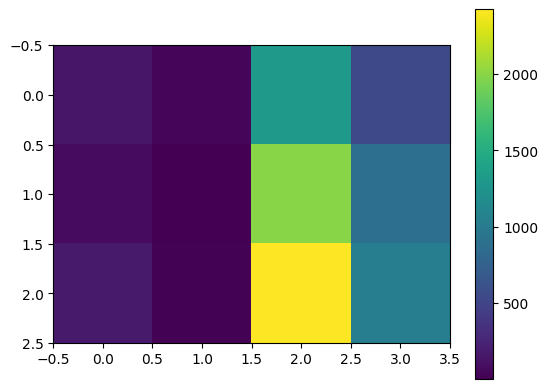

In [14]:
plt.figure()
plt.imshow(deviations)    
plt.colorbar()

In [ ]:
lst_codes = list(set(food_df["PRODUCT_CODE"]))
print(lst_codes)